---|||
# Pandas  Introduction 

It is a Python library used for data manipulation, cleaning and processing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### The core data structure in pandas are Series (column like), and Dataframe(tabular like)
---|||

**Series**: one dimensional array-like object containing
-  sequence of values, **P**
-  an associated array of data labels, called its **index**

> By default, the index ranges from 0 to the len(P) - 1 


In [2]:
file_path = "../datasets/pydata_datasets/haiti/Haiti.csv"

In [43]:
lizzy = 123.45 - 100
print(lizzy)

23.450000000000003


In [42]:
print(lizzy)

1.2345


In [56]:
l = list("abc")
a = ["Pine", "App", "WatM", 1.5] # list

b = ("Pine", "App", "WatM", 2.0) # tuple

c = {"App", "App", 1 , 2, 4 ,4}

# a[3] = "Glasses"
c

{1, 2, 4, 'App'}

In [62]:
pd.DataFrame(b, index=["a", "b", "c", "d"], columns=["Fruits"])

,Fruits
a,Pine
b,App
c,WatM
d,2.0


In [19]:
data = [1, 2, 3, 5, 6,1 , 5, 4 , 4, 3, 1]

np.arange(0, 100,3)

# plt.bar(data, 1, 0.6)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99])

In [14]:
plt.bar?

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 

In [10]:
pd.read_csv(file_path).loc[[3, 4,5], ["Serial", "CATEGORY", "INCIDENT DATE"]]

,Serial,CATEGORY,INCIDENT DATE
3,4049,"1. Urgences | Emergency,",20/06/2010 21:59
4,4042,"1. Urgences | Emergency,",18/05/2010 16:26
5,4041,"5e. Communication lines down,",26/04/2010 13:14


In [55]:
# notice the associated indices
pd.Series([5, 10, 111, 4, 3, 5, 6, 10, 4]).unique()

array([  5,  10, 111,   4,   3,   6])

In [ ]:
# create a series with modified index, using its index parameter

s = pd.Series([10, 20, 30, 40], index=['i', 'j', 'k', 'l'])
s

In [ ]:
# obtain the index of a given series using the index attribute

s.index


---|||
##### The index of a Series can be used to select data corresponding to the index

They act as index to the data sequence

In [ ]:
s['k'], s['i']

##### NumPy-like operations can be used to manipulate a Series object

The index remains unchanged, after the operation(s) is performed

In [ ]:
s[s > 25]

In [ ]:
s * 2

In [ ]:
np.exp(s)

In [ ]:
# query if the series contains a given index

'j' in s

### A good mental model is to think of a Series object as a dictionary of keys and values

- the index are the keys
- the data are the values


In [ ]:
# some states and their corresponding capitals in Nigeria
sdata = {'lagos': 'ikeja', 'ogun': 'abeokuta', 'adamawa': 'lafia'}

# create a series object from the data
s = pd.Series(sdata)
s

In [ ]:
# get the index

s.index

In [ ]:
# query if an index is contained in the series

'lagos' in s, 'fct' in s


---|||

#### Alter the indices of a Series in-place

In [ ]:
index = ['l', 'o', 'a']

# change the indices to index
s.index = index

In [ ]:
s.index


---|||
#### Using the Dictionary to create the series will sort the data based on the keys

This can be overriden by passing the same keys, and in whatever order to the index keyword

> adding a key that doesn't belong in the dictionary will result in the key having a NAN value (a.k.a missing data)

In [ ]:
# adding more indices than data, results in NAN values

# some states and their corresponding capitals in Nigeria
sdata = {'lagos': 'ikeja', 'ogun': 'abeokuta', 'adamawa': 'lafia'}

# using the keys to order the values
s = pd.Series(sdata, index=['lagos', 'adamawa', 'ogun'])
s

In [ ]:
# using a key that is not in the dictionary => 'fct
# will add the key, but its value will benan


s = pd.Series(sdata, index=['ogun', 'fct', 'adamawa', 'lagos'])

s


---|||
#### **isnull** and **notnull** method as a way of detecting missing data

In [ ]:
# find index with missing data in a series

s.isnull()

In [ ]:
# find index without missing data in the series

s.notnull()

In [ ]:
# the query formats (functions and instance method) are equivalent


(
    pd.notnull(s) == s.notnull(),
    
    pd.isnull(s) == s.isnull()
)


---|||
##### Arithmetic Operations on series with similar keys 

When performing arithmetic operations on different series with similar keys, the keys are used to align the data before the operation is performed element wise

In [ ]:
adata = {'i': 11, 'j': 33, 'k': 23}
bdata = {'a': 100, 'j': 23, 'b': 73, 'k': 1000} # keys j, k are in adata

s1 = pd.Series(adata)
s2 = pd.Series(bdata)

In [ ]:
s1

In [ ]:
s2

In [ ]:
# notice that not all the keys are the same

# additional keys thar are not present in either index(es) ...
# wi;; return nan values

s1 + s2

|^|

Notice that keys that doesn't match have NAN values returned

---
---|||
#### Naming a Series 

It is possible to name a series object using the name attribute of kwarg

In [ ]:
sdata

In [ ]:
s = pd.Series(sdata, name='States and Capital in Nigeria')

In [ ]:
s

In [ ]:
# get the name using its index attributes

s.name


---|||
# Dataframe

The other core pandas object is the DataFrame representing a tabular-like data (like excel spreadsheet). It contains

- ordered collections of columns; each column can contain different data type
- a row and column index
 
A good mental model is to think of Dataframe as a dictionary containing

- **keys**: representing the columns, and its column index
-
- **value**:  Series object such that
  -  the keys of the series represent the row index
  - the values in the series represent the data keyed by its row and column index

In [ ]:
# creating a dataframe

data = {'states': ['lagos', 'fct', 'ondo', 'oyo', 'plateau'], 'capital': ['ikeja', 'abuja', 'akure', 'ibadan', 'jos']}

# the row index will automatically default to a number, 
# if we had used the dictionary as is.
# but we pass one in the intialisation

df = pd.DataFrame(data, index=['i', 'j', 'k', 'l', 'm'])

df

In [ ]:
# create a dataframe by passing list
# and we can specify the column index...
# in the order we want them to appear

df = pd.DataFrame(
  [('lagos', 'ikeja', 'SW'),
   ('fct', 'abuja', 'NC'), 
   ('ondo', 'akure', 'SW'),
   ('oyo', 'ibadan', 'SW'),
   ('plateau', 'jos', 'SS')],
  columns=['states', 'capitals', 'geographic_region'], index=['a', 'b', 'c', 'd', 'e']
)

df

In [ ]:
# if we passed this directly, then the columns will be ... 
# ordered based on the keys - (capital, geographic_region, states)

data = {
    'states': ['lagos', 'fct', 'ondo', 'oyo', 'plateau'],
    'capital': ['ikeja', 'abuja', 'akure', 'ibadan', 'jos'],
    'geographic_region': ['SW', 'NC', 'SW', 'SW', 'SS']
    }

# notice the order of the columns indices (geographic.., states, capital)

# also notice that the population index in columns ... 
# is not contained in the data, so its values will be nan

df = pd.DataFrame(data, columns=['geographic_region', 'states', 'capital', 'population'])
df


---|||
#### **Head** or **Tail** Selecting the top or last few elements

We can select the first few elements in the beginning or end of the dataframe using the **head** and **tail** method.

By default they return the first or last five rows in the dataframe, however, we can pass-in a number to indicate the number of rows that should be returned

In [ ]:
# select the first n values of a dataframe
df.head(3)

In [ ]:
df.tail(2)

In [ ]:
# get the column index using the column attributes

df.columns


---|||

# Indexing a Dataframe

Remember that the keys to  the dataframe are its columns index.

When the dataframe object is indexed by the column name, a series containing the row index and its corresponding data is returned.

Indexing can be carried out in two ways; 
- **dictionary indexing**: as key 
- **attribute indexing**: using the name of the column

> the dictionary indexing format is more general, as it can also be used with column index with *space* in their name, which would have other_wise be invalid using attribute. 

In [ ]:
# get all the data in the capital -> a series 

df['capital']

In [ ]:
# using attribute index

df.geographic_region

In [ ]:
# get the population column

df.population

In [ ]:
# assign values to the population column

df.population = [20, 10, 3, 4, 1]
df

In [ ]:
# remember broadcasting?

df.population = 1
df


---|||

#### Adding a new series to an existing dataframe object

Add a new column then;  add a series to a new column in the dataframe

Satisfy the following

- The length of the series data must match the those in the dataframe
- The index length of the series must match those in the dataframe, 
- the index names,that matches those in the dataframe will be aligned
- the index name that doesn't match will be NAN


> Note, if the index length, those of the 

In [ ]:
# change the row index names

df.index = ['one', 'two', 'three', 'four', 'five']
df

In [ ]:
# add a series


# the max length of the series must match those of the dataframe

# the row index, 'five' is not on the new series index ... 
# hence the corresponding value will be nan

# there is no 'not-good' index in the data frame, ... 
# hence its values will not be aligned

s = pd.Series(
    data=['no', 'yes', 'yes', 'yes', 'bad'], 
    index=['two', 'one', 'four', 'three', 'not-good']
    )

# add a new column to the dataframe
# note this can only be created using dictionary key indexing
# as using attribute indexing will not work

df['Visited'] = np.nan
df

In [ ]:
# add the series to the visited column

# notice that the 'not-good' column doesn't match

df.Visited = s
df


---|||
#### Deleting a column from a dataframe

Using the **del** keyword followed by the column selection from the dataframe will delete the column from the dataframe

In [ ]:
df

In [ ]:
del df['Visited']

df


---||| 

#### Swapping Columns and Rows with transpose

Using the **transpose function** or **T attribute** will:

- swap rows to columns
- columns to rows

In [ ]:
df.T

In [ ]:
df.transpose()


---|||

### Creating a new Dataframe from an existing Dataframe

By using an existing dataframe object, one can create a new dataframe.

IF the index key is also specified, then

- any index of the previous dataframe added to this new index, will have its column data in the new data frame

- new index will automatically be assigned nan

In [ ]:
# we only want the data in 'one, five and three' in the new dataframe

# in the new index added, 'ten, nine' will be assigned nan 

df2 = pd.DataFrame(df, index=['one', 'ten', 'five', 'nine', 'three'])

df2

In [ ]:
# set the name attributes of the index and column of a dataframe

df2.columns.name = 'States in Nigeria Info'
df2.index.name = "Numbering"

df2

In [ ]:
# return the values in a dataframe
# the data are returned along the columns axis

df.values


---|||

### Index Object

This is a pandas object that holds the values of
- a Series row index 
- a Dataframe's columns or row index A

The Index Obeject is;

- It is immutable 
- it can be shared among other data structures

In [ ]:
# manipulatiing a Series using its index object

s = pd.Series(
    data=['Mo', 'Usman', 'Kolawole'],
    index=['a', 'b', 'c']
    )
s

In [ ]:
# get the index object

ind = s.index

ind

In [ ]:
# index object are immutable

ind[0] = 'k'

In [ ]:
#  create an index object

ind = pd.Index(data=['l', 'm', 'n', 'p'])

ind

In [ ]:
# use the new index object in a series

s = pd.Series(np.arange(4), index=ind)

s

In [ ]:
ind2 = ['l', 'm', 'n', 'p']

In [ ]:
# remember the difference between (==) and (is)?

# compares element wise; remember vectorization?
s.index == ind2

In [ ]:
# check that they are the same object in memory 

s.index is ind2

In [ ]:
s.index is ind


---|||
### Index Object as a container for Duplicate Object

Since Index Object are immutable, they are similar to a fixed-set in Python, and support Set logic. But unlike Python Sets, they can contain duplicate values   

In [ ]:
# create two pandas object

ind1 = pd.Index(['a', 'b', 'c', 'd', 'm', 'f', 'g', 'l'],)
ind2 = pd.Index(['l', 'm', 'b', 'p', 'a', 'h', 'q', 'r'],)

In [ ]:
# apply set logic to both

# concatenate two Index objects to create a new one

ind3 = ind2.append(ind1)

ind3

In [ ]:
# compute the difference between two set A - B
# this is remove all the elements of B that is also in A,  from A

ind4 = ind3.difference(ind2)

ind4

In [ ]:
# compute the union of two or more

# remember this is set logic, so duplicates will not be allowed
# but an index object itself can contain duplicate values

ind5 = ind1.union(ind2)

ind5


---|||
### Re-indexing a Series 

The **reindex** method allows creating a new Series object, with the data of the old series **aligned** to a new index (if the index of the data in the old series are elements in the new index).

> the data in the new index will be ordered based on how they are passed in the 

In [ ]:
# create a series

s = pd.Series(
    data=np.arange(8),
    index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    )
s

In [ ]:
# index

s.index

In [ ]:
# change the index using the reindex method

# note there are new index values present, 
# so, index in **s** will be aligned to its data in the new series ...
# and new index values will be assigned NAN values

s.reindex(['a', 'i', 'j', 'k', 'b', 'l', 'm', 'c', 'n', 'p', 'd', 'q'])


---|||
### Filling the NAN values in the **reindex** method

When both old and new index values are passed as elements in the reindex method,
the new index values will by default be **aligned** to NAN values. To fill this NAN values, one can pass the method of filling the NAN values.

**Methods**

- ffill: fill the NAN values with the last valid data before it,
- bfill: fill the NAN with the first valid data that comes after it

In [ ]:
# using the same series, from above

s.reindex(
    index=['a', 'i' , 'b', 'j', 'c', 'k', 'd', 'e'],
    method='ffill'
)


In [ ]:
s.reindex?


---|||
### NumPy UFunc and Mappings 

Remember UFuncs are numpy functions that apply an operation to each element of an ndarray, through broadcasting.

In pandas, ufuncs can also be applied to pandas dataframe and series objects


In [ ]:
df = pd.DataFrame(np.arange(24).reshape((6 , 4)))

df

In [ ]:
# apply the sqrt ufunc of the table

np.sqrt(df)


---|||
### Apply Mapping Method



In [ ]:
s = pd.Series(np.arange(1, 10))
df = pd.DataFrame(np.arange(36).reshape(9, 4))

In [ ]:
f =  lambda x: x*x

def g(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [ ]:
s

In [ ]:
s.apply(f)

In [ ]:
df.apply(f)


In [ ]:
df

In [ ]:
df.apply(g, axis=1)


---|||
### **applymap** method

This is similar to apply, except that it applies the passed in function to each element in the dataframe, instead of applying it to a a series along a  specific axis.

In [ ]:
data = np.random.random((5, 6))
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e'])

df

In [ ]:
format = lambda x: '%.3f' %x

In [ ]:
# using apply will try to execute format on the axis (0, by default),
# which should fail, because the format method except single values,
# but the apply method will pass a series object to it

df.apply(format)

In [ ]:
# to overcome this challenge, the applymap method is used

df.applymap(format)

In [ ]:
df


---|||
### Sorting

Sorting can be done in two ways:

- **by values**: sort based on the value in the series or dataframe
- **by index**: sort based on the index in the series OR based on the axis in a dataframe

In [ ]:
s = pd.Series(np.arange(1, 14, 2), index=['c', 'a', 'b', 'k', 'i', 'm', 'e'])

s

In [ ]:
# sort by index in descending order

s = s.sort_index(ascending=False)
s

In [ ]:
# sort by values in ascending

s.sort_values()

In [ ]:
df = pd.DataFrame(np.arange(1, 41, 3).reshape(7, 2), index=[3, 1, 7, 11, 32, 9, 0])

df

In [ ]:
# sort by index along axis = 1

df.sort_index(axis=1, ascending=False)

In [ ]:
# sort by index along axis=0

df.sort_index(axis=0)

In [ ]:
# sort by values along axis = 1, but a key must be specified

df.sort_values(axis=1, by=1)


---|||
# Chapter 6: Data Loading, Storage, and File Formats

---|||
### Loading/Reading of Data into a Dataframe Object

The read_[type] is meant to convert data stored on disk to a Dataframe object.


In [ ]:
# reading a csv formatted data

file_path = "../datasets/Employees.csv"

df = pd.read_csv(file_path)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# set the index column to Unnamed
df = df.set_index('Unnamed: 0')

In [ ]:
df.head()

In [ ]:
# remove index name
df.index.name = ""

In [ ]:
df.head()

In [ ]:
# this multiple operations could be done directly when loading the file

df = pd.read_csv(file_path, index_col=0)

In [ ]:
df.head()


---|||
# Using **read_table** as a general method for loading text data

While *read_csv* is specific to CSV formatted files, one can use *read_table*, and indicate how the data is formatted in an optional seperator key (sep).

The seperator between data points for CSV-formatted file is a comma (,).

In [ ]:
# use read_tables to open the Employee CSV data

df = pd.read_table(file_path)

In [ ]:
df.head()

In [ ]:
# specify the format method in the seperator
# remember the index column

df = pd.read_table(file_path, sep=',', index_col=0)

In [ ]:
df.head()

In [ ]:
file_path = "../datasets/pydata_datasets/babynames/yob1881.txt"

# suppose we don't know how the data is formatted, we use the read_table to peek

df = pd.read_table(file_path)

In [ ]:
df.head()

In [ ]:
# since it is comma seperated, we use the read_csv file

df = pd.read_csv(file_path)
df.head()


---|||
### Using the header key


It is used to specify whether the data has column names(header) associated with it. Whenever the header argument is still specified, then;

- it value is either 0 or NONE
- the default column names (0, 1, 2, 3, ...) based on the inferenced number of columns 

When the **names** key is specified, header must be specified with...

- None: if column names are not present
- 0: if they are present, but will be renamed (using names=[val1, val2, ...])

In [ ]:
# something is amiss, the column names are part of the data
# so we specify that the header (=> column names) is/are absent

df = pd.read_csv(file_path, header=None)
df.head()


---|||
### Setting the column names

This can be achieved by passing a values to the **names** optional parameter in the read_csv method.

There are implications if the length of the passed values exceed those in the data file. In this case, the name is added and populated with NAN values

If the length of the passed values were less than those in the data file, then the the columns not accounted for are used to index the data 

In [ ]:
# to be even more pragmatic, by specify the names we want
# instead of using the default integer column indexing

df = pd.read_csv(file_path, header=None, names=['Name', 'Sex', 'Count'])
df.head()

In [ ]:
df.tail()

In [ ]:
file_path = "../datasets/pydata_datasets/haiti/Haiti.csv"

# peek into the data

df = pd.read_csv(file_path)
df.head(3)

In [ ]:
# get the count of each columns of the dataframe

df.count() 

# observe that the total length is 3593

In [ ]:
# confirm the observation using the shape

df.shape

# its true; there are 3593 rows

In [ ]:
# is the serial number a numbering format or special?

# sort by index
df.sort_values(by='Serial').head()

In [ ]:
pd.read*?

In [ ]:
# change the values of serial to start from 1, by subtracting 3

# since we have a dataframe, and we want to apply and operation on...
# each values in the Serial column, we use the map method

f = lambda x: x - 3

In [ ]:
df.Serial = df.loc[:, 'Serial'] - 3  

In [ ]:
# reindex by Serial

df.set_index('Serial', inplace=True)

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.head()

In [ ]:
# an interesting data set
file_path = "../datasets/pydata_datasets/movielens/movies.dat"

# peek
pd.read_table(file_path).head()

Observations:

- the file has no header: set header to [name, year, genre]
- we have three seperator :: to get the title and genre, () to get the year
- we should replace the |, with something better , a space

- the index of the data should be the first column

In [ ]:
df = pd.read_table(
    file_path,
    header=None,
    names=['num', "title", "year", "genre", ''],
    sep='(\d+)::([^:]+)\s\((\d+)\)::(.*)',
    engine='python',
    keep_default_na=False,
)

In [ ]:
df.head()


---|||
## Handling Missing Values 

It is possible to pass a string or sequence of strings, as values to the **na_values** key, which would marks any occurence of the string(s) as missing values (NAN, NA...) 

In [ ]:
# lets set any Abel and Echo as sentinel value

df = pd.read_csv("../datasets/Employees.csv", na_values=['Able', 'Echo'])

df.tail()

In [ ]:
# re-index

df.set_index('Unnamed: 0', inplace=True)

In [ ]:
df.head()

In [ ]:
# rename index to empty 
df.rename_axis(index="", inplace=True) 

In [ ]:
df.head()


---|||
### **na_values** for all or specific column(s)

It is possible to specify that when a given data, as specified in the **value(s)** passed to the **na_values** key, then the data would be marked as sentinel i.e. the data would be marked as missing if any is found in the dataframe.

It is also possible to specify that we want the matches in specific columns by passing a dictionary, containing a **key-value** pair to **na_values**, such that;

- the key is the specific column name where we want to mark a certain data as sentinel

- the value(s) is/are the data to mark as sentinel in the specified column

In [ ]:
# we could have set the sentinel by selecting the specific column

# lets set any Abel and Echo as sentinel value in the Name column
#and all the values less than four (4) in the YearOfService column

df = pd.read_csv(
    "../datasets/Employees.csv", 
    na_values={
        'Name': ['Able', 'Echo'],
        'YearOfService': [0, 1, 2, 3]       # values less than 4
        },

    # when names is specified, header must be specified with...
    #   None: if column names are not present
    #   0: if they are present, but will be renamed (using names=[])
    header=0, # this allows us to specify no column
    names= ["", "Department", "Name", "YearOfService"], # rename column
    index_col=0
)

df.sort_values(by=['Name'], ascending=True).tail()


---|||
### Converter Optional Parameter

This is a **read_csv, and read_table** optional parameter, that take a dictionary as value.

Its purpose is to apply a **function/mapping f** specified as value to a **key representing the column name, that the function should apply the mapping** to every values in the specified column

In [ ]:
df.head()

In [ ]:
df = pd.read_table(
    "../datasets/a.txt",
    header=0,
    names=["Deparment", "Name", "YearOfService"],
    sep=','
    # index_col=0
)
df

In [ ]:
# based on the observation above, lets change the NAN values in Name to 'MO'abs

f = lambda x: ('Mo' if not x else x )
# def f(x):
    # if x
df = pd.read_table(
    "../datasets/a.txt",
    header=0,
    names=["Deparment", "Name", "YearOfService"],
    sep=',',
    converters={'Name': f}
    # index_col=0
)
df


---|||
### Reading Text Files in Pieces

It is optimal, when reading data in large files, to read the data from the file in small pieces OR iterate through smaller chunks of the file

One way this can be achieved is to specify the number of rows

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# set the display to more compact format

pd.options.display.max_rows = 10

In [ ]:
file_path = "../datasets/pydata_datasets/movielens/movies.dat"

# take a look at the resulting dataframe for example
df = pd.read_table(
    file_path,
    header=None,
    names=['num', "title", "year", "genre", ''],
    sep='(\d+)::([^:]+)\s\((\d+)\)::(.*)',
    engine='python',
    keep_default_na=False,
)

df.shape

There are 3883 rows.

Suppose it was very large, then it would take a lot longer to parse the entire data into the dataframe. One way to avoid this is to specify the **number of rows** we want from the file.

By passing the **nrows** keys, the read_[format] will stop when it reaches the number of rows value specified. This is especially useful when one wants to quickly examine data in a file.

In [ ]:
# instead of reading the entire file, we could specify the number of rows

file_path = "../datasets/pydata_datasets/movielens/movies.dat"

df = pd.read_table(
    file_path,
    header=None,
    names=['num', "title", "year", "genre", ''],
    sep='(\d+)::([^:]+)\s\((\d+)\)::(.*)',
    engine='python',
    keep_default_na=False,
    nrows=3
)

df


---|||
### Reading in chunks, by specifying the chunksize

When the chunksize value is specified, an iterator over the chunks of data in the file is returned.

Here, if the **chunksize == p**, then p amount of rows will be returned everytime we call **next** on the iterator (or we iterate using for loop), until, there are no more data to iterate over

More interestingly, we can call the **get_chunks(size=val)** method, and specify a certain **val**, over the iterator returned, to

- read less than the value of rows that would have been returned in a given iteration,  **if val < p**

- read more than the value of rows that would have been returned in a given iteration, **if val > p**

- read a given number of rows from a given iteration, based on the value of the specified size in the **get_chunks** method

In [ ]:
file_path = "../datasets/pydata_datasets/movielens/movies.dat"

# specify the chunksize to get an iterator

chunk = pd.read_table(
    file_path,
    header=None,
    names=['num', "title", "year", "genre", ''],
    sep='(\d+)::([^:]+)\s\((\d+)\)::(.*)',
    engine='python',
    keep_default_na=False,
    chunksize=20
)

# in this iteration get the firs 20 rows
next(chunk)

# in this iteration, we get 22 rows; more than the chunksize specified
print(chunk.get_chunk(size=22).shape)

# in this iteration, we get the default chunksize specfied; 20
print((next(chunk).shape))

# in this iteration, we get 10 rows; less than the chunksize specified
print(chunk.get_chunk(size=10).shape)

In [ ]:
file_path = "../datasets/pydata_datasets/movielens/movies.dat"

# specify the chunksize to get an iterator

chunk = pd.read_table(
    file_path,
    header=None,
    names=['num', "title", "year", "genre", ''],
    sep='(\d+)::([^:]+)\s\((\d+)\)::(.*)',
    engine='python',
    keep_default_na=False,
    chunksize=10
)

# print the number of iterations it takes to read the entire file
count = 0
tot_rows = 0
for piece  in chunk:
    count += 1
    tot_rows += piece.shape[0]
    # print((piece.shape))

'It took {0} iterations to read {1} number of rows'.format(count,  tot_rows)


---|||
### Writing Data To Text Format

Using the **to_[format]**, we can save a dataframe data to disk based on the format specified


dataframe.to_[format]([name.[format])


- dataframe.to_excel([name.xlsl]): to excel format
- dataframe.to_csv([name.csv]): to csv formatted
- dataframe.to_json([name.json]): to json

In [ ]:
file_path = "../datasets/Employees.csv"

df = pd.read_csv("../datasets/Employees.csv", index_col=0)
df

In [ ]:

# to json; the record format omit the index 

df.to_json("employee.json", "records")

In [ ]:
# save to csv fomat, 
# but instead of the delimeter being comma, we use |

df.to_csv("employee.csv", sep="|")

In [ ]:
# observe the following data
file_path = "a.txt"

# since it is a .txt file, we use the read_table format
# actually, we could have used a read_csv, since we know it is comma seperated

df = pd.read_table(file_path, sep=',', index_col=0)

df

#### Observations

There are missing values in the Name column, to replace this, missing values with another value, we could have used the **converter** method while reading the file.

However, we want to save this data to disk, and replace any missing values with **another name**.

To achieve the above, we pass the **value** to **na_rep** key. This value will  stand in for the missing values in the dataframe 

In [ ]:
df.to_csv("employee_NULL_for_NA.csv", sep='|', na_rep="NULL")

In [ ]:
# we could also remove the column labels by passing a header as false
df.to_csv("employee_NULL_for_NA_w-o_header.csv", sep='|', na_rep="NULL", header=False)

In [ ]:
# we could also remove the index by passing an index key as false
df.to_csv("employee_NULL_for_NA_w-o_header_w-o_index.csv", sep='|', na_rep="NULL", header=False, index=False)

In [ ]:
# instead of writing the output to a file, by passing the file name,
# we could output the result into standard output, which will just print the result

# get the stdout
from sys import stdout

df.to_csv(stdout, sep='|', na_rep="NULL", header=False, index=False)

In [ ]:
# we can also indicate which columns we are interested in

# we could also remove the index by passing an index key as false
df.to_csv(stdout, sep='|', na_rep="NULL", index=False, columns=["Department", "YearOfService"])


---|||
### Binary Data Formats

One can take data in a different format and store it in binary format, in a process known as serialization

The reverse is known as deserialization. 

In [ ]:
# read a csv file and save it in binary format

f = lambda x: "NULL" if not x else x

df = pd.read_table("a.txt", index_col=['Unnamed: 0'], sep=',', converters={'Name': f})

df

In [ ]:
# store it to binary format

df_bin = df.to_pickle("employee_NULL_w-o_header_to_binary")

In [ ]:
# load the binary file

df = pd.read_pickle("employee_NULL_w-o_header_to_binary")
df


---|||
### Storage Formats

HDF5: Hierachical Data Format

This is a file format used for **storing large quantities** of scientific array data. 

An HDF5 file can store multiple datasets, and metadata as a key-value pair. Interestingly, it supports the compression of those file, using **a variety of compression modes**, so that data with repeated pattern are stored efficiently.

In [ ]:
# store a dataframe in HDF5 format

# create the dataframe
df = pd.DataFrame({'a': np.random.randn(100)})

# store as hdf
store = pd.HDFStore('data.h5')

In [ ]:
# store the dataframe

store['obj1'] = df

In [ ]:
store['obj1_col'] = df['a']

In [ ]:
print(store.info())

In [ ]:
# retrieve the df

store['obj1']

In [ ]:
# retreive the data in col a

store['obj1_col']


---|||
### Storage Schema

Two schema (i.e. mode of storing data) are supported by HDF5Store;

- fixed: fast, but doen't support query operations

- table: slow, but supports query operation

In [ ]:
df2 = pd.DataFrame({'b': np.random.randn(40), 'e': np.random.randn(40)})

store.put('obj2', value=df2, format='table')

In [ ]:
# note, if storage schema is "fixed, then this query operation will fail
store.select('obj2', where=['index >= 10 and index <= 15'])

In [ ]:
# close the storage

store.close()

In [ ]:
# confirm close

store['obj1']

In [ ]:
# performing the same operation using read_hdf5, and to_hddf. 
a = np.arange(20).reshape((10, 2))

df  = pd.DataFrame(a, columns=['a', 'b'])

df.to_hdf('rdata.h5', 'obj', format='table')

In [ ]:
pd.read_hdf('rdata.h5', 'obj', where= ['index >=3', 'columns = a' ])


---|||
# Chapter 7: Data Cleaning and Preparation

> Note: cleaning and preparing data should be done within the context of the analysis of the data, how the data is collected

**Steps Involved in Cleaning and Preparing Data for Analysis**

- **Filtering**:

    - duplicates
    - missing values
    - badly represented string values
    - detecting outliers

- **Transformation**:
    
    - mapping data to new form
    - replacing data 
    - transforming badly represented string values
    - renaming indexes (rows and column index)

Cleaning involves removing data-points that will have adverse effect on the kind of analysis we want to perform on the data. This involve;

- missing data
- duplicates fata
- badly processed data (e.g. strings that contains special characters)

Preparation on the other hands comes after cleaning. It involves processing the cleaned data to a form that is suitable for the analysis to be be performed. This includes;

- joining
- grouping


---|||
### Querying A Series or Dataframe for Missing Data

- isnull: returns an array of boolean with True specified for sentinel value
- notnull: returns an array of boolean with False specified for sentinel value

In [ ]:
from numpy import nan as NA

In [ ]:
data = {
    'a': [1, NA, 3, 6, 9, NA],
    'b': [2, 4, NA, NA, 8, 10],
    'c': [NA, NA, 10, NA, 20, NA ]
}

# create a dataframe

df = pd.DataFrame(data)

df

In [ ]:
# use the isnull to check for all the sentinel values in column a

df['a'].isnull()

In [ ]:
# check all the non-null values in column b

df['b'].notnull()


---|||
### Filtering Missing Data

**dropna**

This by default drop any rows containing a sentinel value.


Customization:

- axis: 0 (rows), 1(columns)
- how: "all" or "any"
- thresh: indicates the number of non-sentinel values required to NOT drop

In [ ]:
df

In [ ]:
# remove all the rows containing missing data

df.dropna()

In [ ]:
# add a new column containing non-sentinel values

df['d'] = 33

df

In [ ]:
# instead of remove rows by default, remove columns containing sentinels

df.dropna(axis=1)

In [ ]:
# specify the number of non-sentinel values as condition for dropping a row

# only remove rows that contains less than 2 non-sentinel values

df.dropna(thresh=2)

In [ ]:
# use axis 1

df.dropna(axis=1, thresh=4)

In [ ]:
# add a new index to the dataframe

df = pd.DataFrame(df, index=[0, 1, 2, 3, 4, 5, 6])

df

In [ ]:
# specify that only rows where all values are sentinel be dropped

df.dropna(how="all")


In [ ]:
# add an e column containing missing values

df = pd.DataFrame(df, columns=['a', 'b', 'c', 'd', 'e'])

df

In [ ]:
# specify that only columns where all values are sentinel be dropped 

df.dropna(axis=1, how="all")


---|||
### Filling Missing Data

The consideration here is to replace the missing data with another value, so as to avoid discarding non-sentinel data from the series or dataframe

**fillna**: used to fill sentinel values in a dataframe

Customization:

method: "ffill", "bfill"

In [ ]:
df

In [ ]:
# fill all sentinel values with a 0

df.fillna(0)

In [ ]:
# we can chose how to fill sentinel values by columns

df.fillna({'a': 22, 'b': 111, 'c': 999, 'd': 1000, 'e': 333})

In [ ]:
df

In [ ]:
# we can chose to fill sentinel values in each columns by the last valid value before the sentinel in that column

df.fillna(method="ffill")

In [ ]:
df

In [ ]:
# we can also specify the number of values we want to forward fill (ffill)

# we only fill one sentinel value that follow each other consecutively using the last valid value

df.fillna(method="ffill", limit=1)

In [ ]:
df

In [ ]:
# used bfill to fill the sentinel values
# using the first valid value after the sentinel value

df.fillna(method="bfill")


---|||
### Data Transformation

This involves transforming the data to produce a standardized version of the data that can be used in analysis. Transforming the data includes;



In [ ]:
data = {"a1": [3, 4, 6, 3, 4, 6, 3], "a2": [3, 4, 6 ,3, 4, 6, 3], "a3": [1, 4, 6, 1 ,4, 6, 5]}

# create the dataframe with only four unique index 

df = pd.DataFrame(data, index=["one-1", "two-1", "three-1", "one-2", "two-2", "three-2", "four-1"])

df

In [ ]:
# check for duplicates data in all the columns
# note, the index is not considered in duplicated operation by default

df.duplicated()

# indicates that 5th and 6th rows are duplicated

# ---
df

In [ ]:
# select duplicates based on a subset of columns

# check for duplicates in a1 and a2

df.duplicated(subset=["a1", "a2"])

In [ ]:
# select duplicates based on a subset of columns

# check for duplicates in a1 and a3

df.duplicated(subset=["a1", "a3"])

In [ ]:
# select duplicates based on a subset of columns

# check for duplicates in a2 and a3

df.duplicated(subset=["a2", "a3"])


---|||
### Filtering out Duplicated Data

**drop_duplicates**

By default, it drops the duplicated rows; here the elements in all the columns must match. This can be customized to choose a subset of the columns that will be considered before dropping the rows.

In [ ]:
df

In [ ]:
# remove duplicated data, whose values match in all the columns
# this method does not remove both the original and duplicates... 
# it only removes the duplicated data

df.drop_duplicates()

In [ ]:
# we can customize this to remove both the orginal and duplicates

df.drop_duplicates(keep=False)

In [ ]:
# we could instead keep the last duplicates

df.drop_duplicates(keep="last")

In [ ]:
# or we could keep the first which is the default

df.drop_duplicates(keep="first")

In [ ]:
# lets use the columns subset to drop duplicates

# any duplicate in a1, and a2, should be used to drop the duplicates

df.drop_duplicates(subset=["a1", "a2"]) 

In [ ]:
# any duplicate in a2, and a3, should be used to drop the duplicates

df.drop_duplicates(subset=["a2", "a3"]) 


---|||
### Transformation Using A Function

Instead of dropping missing data, and losing other valid datapoints with it, we may wish to transorm the sentinel values to another value that won't have adverse effect on the analysis. 

A function or mapping is specified to transform data in a series or columns in a dataframe.

In [ ]:
# 

data = {
    "country": ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
    "population": [20, 10 ,1, 3, 1.5, 4, 2, 9]
}

file_path = "a.txt"

df = pd.read_table(file_path, sep=',', index_col=0)
df

In [ ]:
# fill all the na values with "null"

df.fillna({"Name": "null"}, inplace=True)

In [ ]:
df

In [ ]:
# let standardize the data so that all the data in 
# department and name are in uppercase

df["Department"] = df.loc[:, ["Department"]].applymap(lambda x: x.upper())
df["Name"] = df.loc[:, ["Name"]].applymap(lambda x: x.upper())


---|||
### Stringifying a Series

This will convert all the data in the series to  their string representation. When this succeed, string methods can be applied on each data in the series.

> Note: this applies only to a series

In [ ]:
# we could have achieved the same thing as above by
# first converting it to a string format, and then use strings method

df.loc[:, "Department"].str.lower()

In [ ]:
df


---|||
### Series Map method

This accepts a dictionary or function that takes a datapoint and map it to another value; IF the argument is a:

**Dictionary**

==series.map([dictionary={key:value}])==

Then it would map each **key** that is contained in the **series instance** to a new **value**. IF the key is however not present in the series, it would be mapped to nan.

**Function**

==series.map(function)==

Then the function would be apply to each datapoint to produce the corresponding output


In [ ]:
df

In [ ]:
df["Department"] = df["Department"].map(lambda datapoint: datapoint.lower())
df["Name"] = df["Name"].map(lambda datapoint: datapoint.lower())

df

In [ ]:
# lets map marketing - sales, engineering - tech and accounting - finance

df["Department"].map({"marketing": "sales", "engineering": "tech", "accounting": "finance"})

In [ ]:
# we could have done the above using a custom function

def department_mapping(datapoint: str):
    # accounting
    if datapoint.startswith('a'):
        return "finance"

    # engineering
    if datapoint.startswith("e"):
        return "tech"

    # marketing
    # since we know our datapoint falls into these three categories,
    # ... and that there are no sentinels in this column, ... 
    # we know that marketing is the only category that hasn't been checked. 
    return "sales"
    # if datapoint.startswith("m"):
        # return

In [ ]:
# apply the funtion
df["Department"].map(department_mapping).str.capitalize()


---|||
### Data Replacement

This generally involves substituting another value for sentinels and non-sentinels datapoints.

This is more flexible than using the **fillna** method

**replace(to_replace, value(opt))**

**Single Replacement**

- **datapoint** to a **value**

**Multiple Replacement**

- a **list of datapoints** to a **list of values**: both lists length must match

- we can use a dictionary such that:
    - **keys** specifies the datapoints to replace, and
    - **values** specfies what to replace the datapoints with

    > if this is intended, then the **value optional parameter** would not be passed

    IF the value parameter is however specified, this imply that, we want to search a dataframe having its column as the **keys** specified, and to search for any datapoints equal to the **value** specified, and replace those datapoints to the one given in the **list of values specified in the optional value parameter.

- we can also use a dictionary that contains another dictionary such that;

    - the outer dictionary is such that its;
        - **keys**: represent the columns to perform the replacement operations
        
        - **values**: is the inner dictionary containing;
            - **keys** representing the datapoints to replace
            - **values** representing what to replace the datapoints with

    > Here also, the **value optional parameter** will not be specified
            


In [ ]:
df

In [ ]:
# use replace to perform the same mapping above

df.replace({
    "Department": 
        {
            "accounting": "finance",
            "marketing": "sales",
            "engineering": "tech"
        },
    "Name": {
            "null": "Mo"
        }
        
})

In [ ]:
# using another dictionary format

df.replace({"Name": "null" }, value= "Xango")

In [ ]:
# using list

df.replace(
    ["null", 'engineering', 'accounting', 'marketing'],
    ["Xango", "Techers", "Salers", "Financers"]
 )


---|||
### Renaming Axis Indexes

The axis indexes can be replaced by calling the map method an instance.

In [ ]:
# get the index

df.columns

In [ ]:
# rename the index to uppercase

to_uppercase = lambda x: x.upper()  

df.columns = df.columns.map(to_uppercase)

In [ ]:
df

In [ ]:
# using the rename method instead creates a copy

df.rename(columns=str.lower)

In [ ]:
# use a dictionary instead
# remember the columns are already in uppercase, hence making the keys in uppercase
df.rename(columns={
    "department".upper(): "Department",
    "name".upper(): "Name",
    "yearofservice".upper(): "YearOfService"
})


---|||
# Discretizing and Binning Data

This allows separating data into a given discrete value.

In [ ]:
df


---|||
### **cut** function

Takes a one-dimensional array and a segment that determines how the data would be divided.

It returns a series with its values as the segment where each datapoints falls in

NOTE:

- if an array is passed to cut for binning, a **Categorical** object is returned, and we can access the index of the categories (codes) and categories by using the attributes directly

- if a series is passed, then a series is returned. To access the codes and and categories attribut, we must first convert the returned series to a categorical object using the **cat** attribute. 


In [ ]:
# divide the year of service into bins 1 to 2, 3 to 7, 8 to 12, and 13 to higher values

bins = [0, 2, 7, 12, 20]

category = pd.cut(df["YEAROFSERVICE"], bins)
category

In [ ]:
# get the categories each datapoints falls into

category.cat.categories

Observe that the categories are close to the right and open to the left; i.e. (., .]

This can be changed by specfiying the **right** parameter in the cut instance

In [ ]:
# get the index of each category the data points falls into

# 0 -> (0, 2], 
# 1 -> (2, 7]
# 2 -> (7, 12]
# 3 -> (12, 20]
category.cat.codes

In [ ]:
# divide the year of service into bins 1 to 2, 3 to 7, 8 to 12, and 13 to higher values

# have a closed interval at the leftm and open to the right
bins = [0, 2, 7, 12, 20]

category = pd.cut(df["YEAROFSERVICE"], bins, right=False)
category

In [ ]:
# get how many values falls in each segments using value_counts

pd.value_counts(category)

It is possible to pass an identifier to identify each segments

This is achieved using the **label optional parameter**

In [ ]:
# divide the year of service into bins 1 to 2, 3 to 7, 8 to 12, and 13 to higher values

bins = [0, 2, 7, 12, 20]

# since we have four segment, we must pass a list having four label

category = pd.cut(
    df["YEAROFSERVICE"],
  bins, 
    labels=[
        "> 0 and <= 2",
        "> 2 and <= 7",
        "> 7 and <= 12",
        ">12 and <=20"
    ])

category

In [ ]:
# view the category

category.cat.categories

In [ ]:
# we can pass an integer for bin, and it will  compute equal length bins

# divide the year of service into bins 4 to higher values

category = pd.cut(df["YEAROFSERVICE"], bins=4)
category.cat.categories

In [ ]:
# constrain the floating point values to a given precision
# by passing a precision parameter

data = np.random.random(20)

category = pd.cut(data, bins=4, precision=3)
category.categories


---|||
### Binning Using Quantiles using **qcut**


In this case, it will bin the datapoints into the specified integers, where:

- 2 ==> into two
- 4 ==> into quartiles
- 100 ==> percentiles

e.t.c

In [ ]:
# divide the YearOf Service into percentiles

category = pd.qcut(df["YEAROFSERVICE"], 100, duplicates="drop")

category

In [ ]:
# check how many categories

category.cat.categories.value_counts()


---|||
### Detecting and Filtering Outliers

**sign method(it is a numpy method)** : takes a dataframe or series, and produce
-  (+1) if the element is postive

-  (-1) if the element is postive

    and return the corresponding series or dataframe

**sample method**: takes a series or dataframe, and generate a random sample based on the number passed as argument. Additionally, the replace boolean keyword can modified such that IF set to;

- True: the sample will be generated **with replacement**: the sample size can be greater than the population size

- False: the sample will be generated **without replacement**: the sample size must be less than the population size

**take method**: takes an array of row index, and produce the series or data frame with the passed row indexes

In [ ]:
np.sign(pd.Series([-3, 4, -7, 8]))

In [ ]:
data = np.random.randn(20).reshape((5, 4))

df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd'])

df

In [ ]:
# sign

np.sign(df)

In [ ]:
# take method

df.take([0, 3, 2])

In [ ]:
# take 3 samples without replacement: 
# in this case the sample(n=3) cannot be greater than the population (total n = 5)

df.sample(n=3, replace=False)

In [ ]:
# take 10 samples with replacement
# in this case the sample(n=10) can be greater than the population (total n = 5)

df.sample(n=10, replace=True)


---|||
### Computing Indicator/Dummy Variables

Converting a **categorical variable** into a **dummy or indicator matrix** using the categorial variable: with 0 indicating absent, and 1 indicating present


In [ ]:
df = pd.DataFrame(
    {'key': ['i', 'j', 'k', 'j', 'k', 'i', 'p', 'j', 'p'],
     'data': range(9)
})

df


In [ ]:
# create the indicator matrix

# this creates a matrix, with 0 indicating absent, and 1 indicating present

pd.get_dummies(df["key"])

In [ ]:
# add a prefix to the categorical variable

dummy_matrix = pd.get_dummies(df['key'], prefix='category')

dummy_matrix

In [ ]:
df_with_dummy = df[['data']].join(dummy_matrix)
df_with_dummy

In [ ]:
# indicator matrix using the movielens dataset

file_path = "../datasets/pydata_datasets/movielens/movies.dat"

# movies = pd.read_table(file_path, header=None, names=["movie_id", "title", "genre"], sep="::")
movies = pd.read_table(file_path, header=None, names=["movie_id", "title", "genre"])

movies.iloc[37]

In [ ]:
file_path = "../datasets/pydata_datasets/movielens/movies.dat"
f = lambda x: int(x) if not np.nan else x
mov = pd.read_table(
    filepath_or_buffer=file_path,
    sep=r"(\d*)::\s?(.+)\((\d*)\)?::(.*|\s)$",
    engine="python",
    header=None,
    names=["num", "movie_id", "title", "year", "genre_1", ""],
    converters={"year": f, "genre_2": g}
)

mov

In [ ]:
mov_cleaned = mov.dropna(how="all", axis=1)

In [ ]:
mov_cleaned

In [ ]:
gen = mov.genre_1.str.strip()
gen = gen.str.split("|")

gen.str.join(", ")

In [ ]:
# get the unique genres

genre = df["genre"].str.strip()
genre = genre.str.split('|')

genre

In [ ]:
# add all the result into a single list
all_genre = []

for x in genre:
    all_genre.extend(x)
len(all_genre)

In [ ]:
# get the unique ones

uniq_genre = pd.unique(all_genre)

uniq_genre

In [ ]:
# construct the indicator matrixe

# remember, the categorical variable will be the columns of the matrix, and
# the rows of the matrix will correspond to that of the entire dataset

# create a zero_matrix, that will have the shape of the resulting indicator matrix
zero_matrix = np.zeros((len(movies), len(uniq_genre)))

# create the dataframe, with 0's, but the columns are the categorical variable (uniq_genre)
dummies = pd.DataFrame(zero_matrix, columns=uniq_genre)
dumies_copy = dummies.copy()
dummies.head()

In [ ]:
for i, gen in enumerate(movies.genre):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

# this is the same as above
# for i, genre in enumerate(movies.genre):
#     genre = genre.split('|')

#     dumies_copy.loc[i, genre] = 1

In [ ]:
movies_with_indicator = movies.join(dummies.add_prefix("Genre_"))

In [ ]:
movies_with_indicator.tail()

In [ ]:
# we have to iterate through the movies, genre, 
# and if a row has a given genre in its values, 
# we should add a 1 to the the column containing the genre

movies.head()

genre = movies.genre
genre.str.contains('Animation')

np.where(cond, 1, 0)

In [ ]:
dumies_copy


---|||
### String Manipulation & Regular Expression

**Important String Methods**

- *startswith and endswith*
- *join*
- *find*: returns -1 if it fails to find the requested data
- *strip, rstrip and lstrip*: trim whitespaces, including newlines(\n)
- *replace*
- *split*

---|||
#### Regular Expression

- **Compiling a regular exepression**:

Suppose we want to apply a regular expression method on different strings for the purpose of processing the strings, then it is better, for efficiency, to compile the regular expression, before calling the method on the strings. 


- **Regex Methods**

0. **compile**: this allows us to compile the regex, and possible flags, so that we can utilize it with different methods (as given below) by saving us the compilation step. Consequently, it saves us of CPU cycles.

1. **search**: returns an object that can be queried for the *starting* and *ending* position of the first match.

2. **match**: it does the same thing as *search* above. But it starts matching at the beginning of the string, **unlike *search that scans through the string to find its first match**

3. **findall**: this returns all the matches

4. **split**: similar to Python native split method on strings, although this is now within the context of regex.

5. **sub**: returns a new string with the matched occurences replaced with a new strings



In [499]:
regex.match?

Signature: regex.match(string, pos=0, endpos=9223372036854775807)
Docstring: Matches zero or more characters at the beginning of the string.
Type:      builtin_method

In [463]:
# import the regular expression library
import re

In [502]:
text = "  foo      bar\t  baz     \tqux"

# compile the regular expression "\s+", so we can use different methods on it
regex = re.compile('\s+')

In [505]:
# return the position where the first match occurs

regex.search(text)

<re.Match object; span=(0, 2), match='  '>

In [506]:
# split on matches

regex.split(text)

['', 'foo', 'bar', 'baz', 'qux']

In [507]:
regex.match(text)

<re.Match object; span=(0, 2), match='  '>

In [508]:
# find all the matches

regex.findall(text)

['  ', '      ', '\t  ', '     \t']

In [509]:
regex.sub("REPLACEMENT-TEXT", text)

'REPLACEMENT-TEXTfooREPLACEMENT-TEXTbarREPLACEMENT-TEXTbazREPLACEMENT-TEXTqux'


---|||
### Vectorized String Functions In Pandas

Pandas allows the use of native python string methods, and regex methods, through "stringifying" a column using the **str** attributes.


In [510]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}

In [512]:
data = pd.Series(data)

In [516]:
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [539]:
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [540]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [543]:
matches = data.str.match(pattern, flags=re.IGNORECASE)

matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [546]:
data.str.get(1)

Dave       a
Steve      t
Rob        o
Wes      NaN
dtype: object


---|||
# Chapter 9: Plotting and Visualization

**Importance of Visualization in Data Analysis**

- Identify Outliers
- Identify a possible need for Data Trasnformation
- Generating ideas for model
- Building interactive visualization for the web

**matplotlib**: is a python package for creating publication-quality plots  (mostly two-dimensional visualization), and these plots can also be exported to different formats such as PDF, SVG, JPG, PNG, GIF,e.t.c.

**seaborn**: "is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics."

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.arange(10)

data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

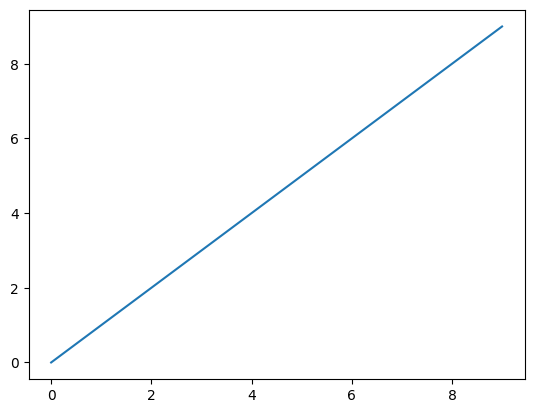

In [3]:
# a simple plot of datapoints

plt.plot(data)


---|||
### The Figure Object

All plots in **matplotlib** resides within a **Figure** object. 

A mental model to reason about Figure is to think of it as the *canvas* that we plot on.

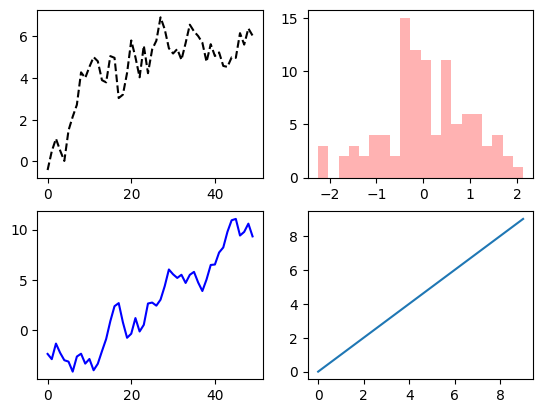

In [4]:
# create a new figure object
fig =plt.figure()

# create a (sub)plot on the figure object

# the add_subplot argument takes three argument: nrows, ncols, and the index

# 2 x 2 figure object => 4 plots in total, this will be the 1st plot

ax1 = fig.add_subplot(2, 2, 1)  

# 2nd plot
ax2 = fig.add_subplot(2, 2, 2)

# 3rd plot
ax3 = fig.add_subplot(2, 2, 3)

# 4th plot
ax4 = fig.add_subplot(2, 2, 4)

plt.plot(data) # automatically plot on the last subplot

# we explicitly specified the first one with a style option (k--)
ax1.plot(np.random.randn(50).cumsum(), 'k--') # k-- => black dashed line 

# selecting the third, and specifying a style option (b-)
ax3.plot(np.random.randn(50).cumsum(), 'b-') # the b- => blue and solid line


# plot a histogram 

_ = ax2.hist(
    np.random.randn(100),
    bins=20,
    color='r',
    alpha=0.3
)

Another convenient method, for creating subplots on a figure object is by using the **subplot** method, which will in turn **create a new figure object, and returns a NumPy array containing the created subplot objects**.

**Arguments to The *subplot* method**

- nrows: how many rows we want on the figure object
- ncols: how many columns we want on the figure object
- sharex: a boolean that determines whether all the subplots must use the same x-axis ticks (values)
- sharey: a boolean that determines whether all the subplots must use the same y-axis ticks (values)
- figsize: used to set the width and height of the figure object

The returned array, containing the axes objects, can easily be indexed to create subplots

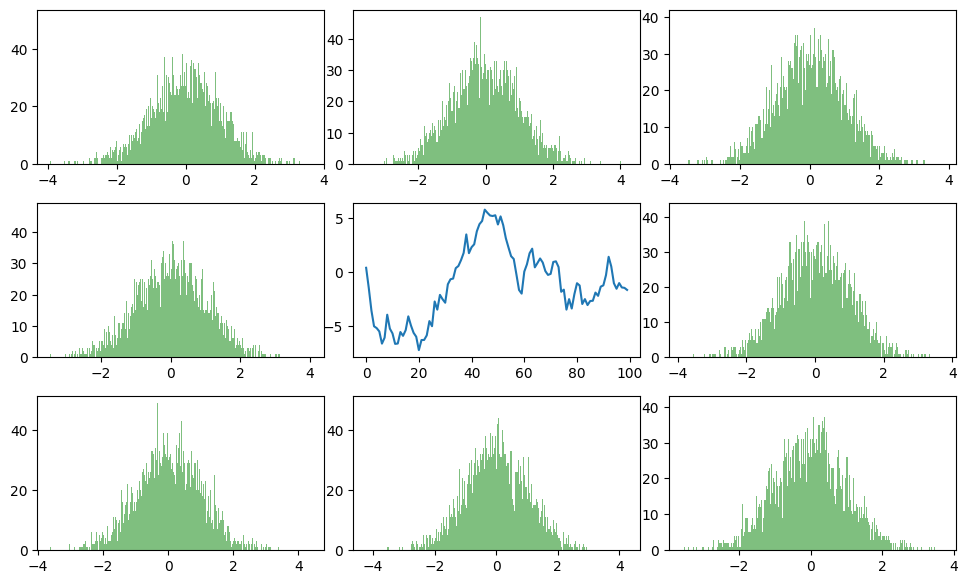

In [5]:
# create 9 (3 x 3) subplots object on a figure

fig, axes = plt.subplots(3, 3, sharex=None, figsize=(10,6))

# we use the tight_layout to avoid overlaps between subplots
plt.tight_layout()

# create a plot on the axes in the second row, second column
axes[1, 1].plot(np.random.randn(100).cumsum())

# a plot of histograms on the remaining axes

for i in range(3):
    for j in range(3):
        if i == 1 and j == 1:
            continue
        axes[i, j].hist(np.random.randn(10000), bins=1000, color='g', alpha=0.5)

# change the spaces between axes such that they almost overlap
fig.subplots_adjust(wspace=0.1, hspace=0.25)


---|||
### Colors, Markers, and Line Styles

These are represented as keyword arguments:

**color**: either hexcode or abbreviations

- green: g
- red: r
- blue: b
- black: k, and many more

**linestyle**: the style used to fit the data points

- dashed = --
- star = *
- solid = -
- dashdot = -.
- dotted = :

**markers**: use to highlight the actual data points in the plots, passed as abbreviation

- o: circular
- p: pentagon
- d: diamond shaped
- h: hexagon
- x: cross
- *: star

In [7]:
from numpy.random import randn

(0.0, 100.0)

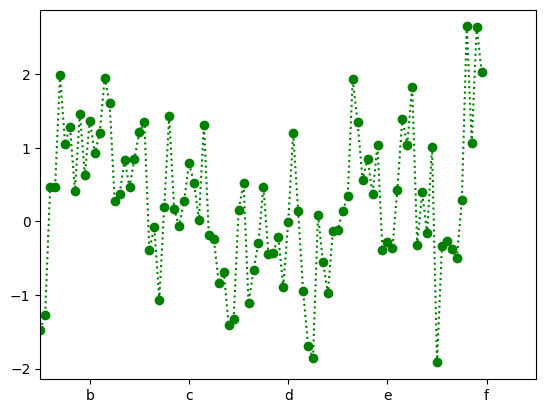

In [26]:

plt.plot(randn(90).cumsum(), color='g', linestyle= ':', marker='o')
plt.xticks(np.arange(-10, 110, 20), labels=["a", "b", "c", "d", "e", "f"])
plt.xlim(0, 100)

The same specification could be combined as follows:

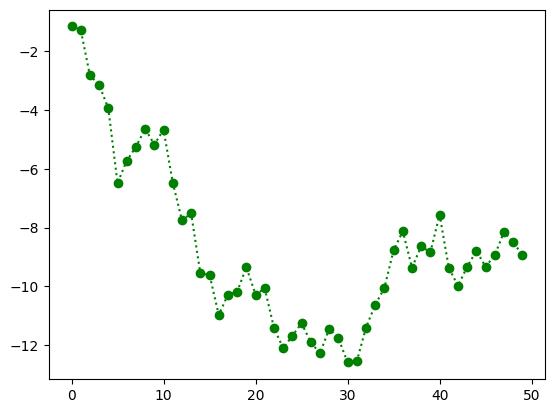

In [69]:
plt.plot(randn(50).cumsum(), 'g:o')

In plots, the resulting line is fitted to the actual data, while the subsequents parts (i.e. between data points) are interpolated.

It is possible to overide this interpolation using: 

- **drawstyle**: 


In [131]:
data = randn(30).cumsum()

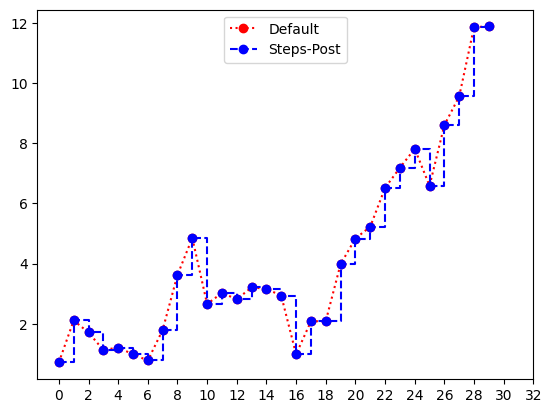

In [161]:
plt.plot(data, 'r:o', label="Default")

plt.plot(data, 'b--o', drawstyle='steps-post', label='Steps-Post')

plt.xticks(np.arange(0, 34, 2))

# plt.xlim(0, 34)
plt.legend(loc='upper center')

**Labels**: this is a descriptive name given to a single plot

**Legends** allows the identification and display of **labels** on the axes. Any single value or a combination of the following will determine the locations of the **label(s)**; [lower, upper, right, left, center].

> Note: when a combination is used, then a space must seperate the values

**ticks** is used to indicate the divisions on the axes: **xticks** and **yticks** 

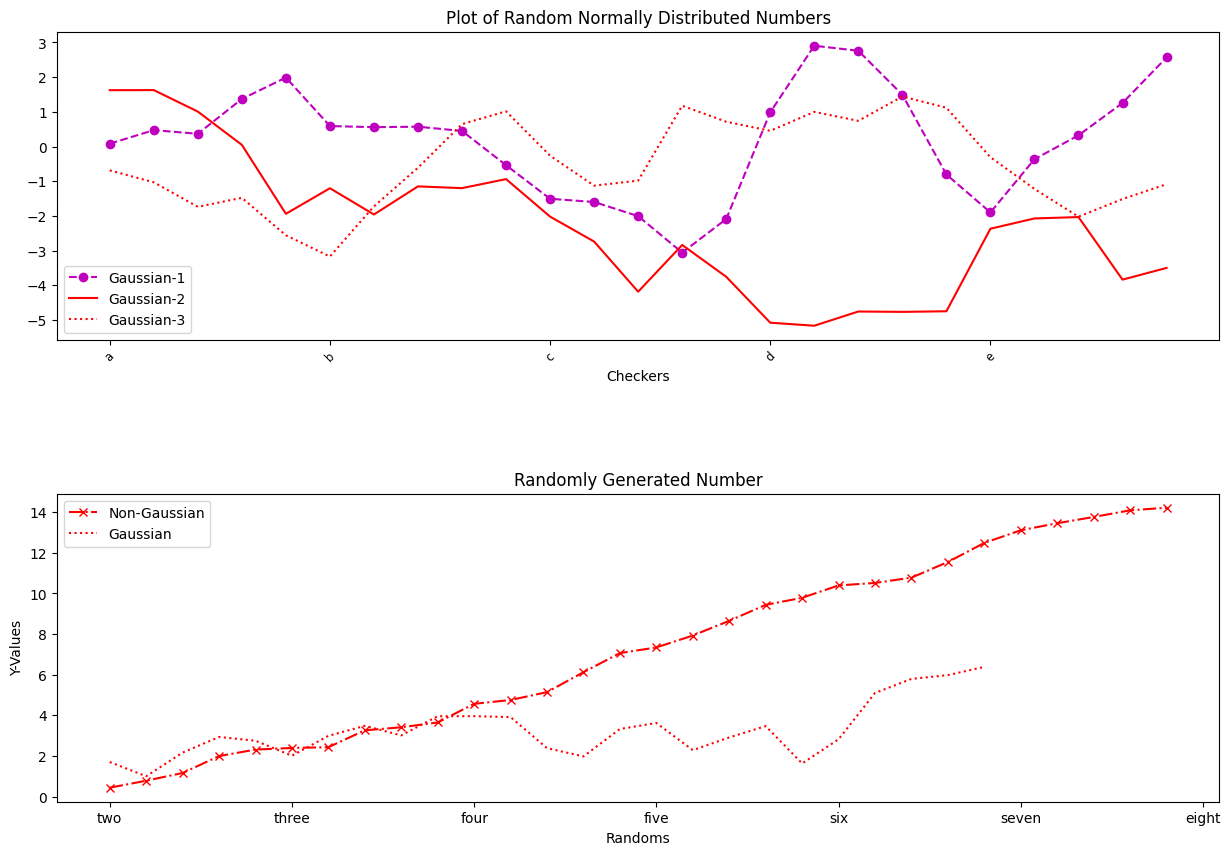

In [98]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(np.random.randn(25).cumsum(), "m--o", label="Gaussian-1")
axes[0].plot(np.random.randn(25).cumsum(), "r-", label="Gaussian-2")
axes[0].plot(np.random.randn(25).cumsum(), "r:", label="Gaussian-3")
axes[0].set_xticks(np.arange(0, 21, 5))
axes[0].set_xticklabels(["a", "b", "c", "d", "e"], rotation=45, fontsize="small")
axes[0].set_title("Plot of Random Normally Distributed Numbers")
axes[0].set_xlabel("Checkers")
axes[0].legend(loc="best")
# axes[0].legend(loc="upper left")

# second plot with properties from a dictionary

props = {
    'title': "Randomly Generated Number",
    'xlabel': "Randoms",
    'ylabel': "Y-Values",
    'xticklabels': ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight']
}

axes[1].plot(np.random.random(30).cumsum(), 'r-.x', label="Non-Gaussian")
axes[1].plot(np.random.randn(25).cumsum(), "r:", label="Gaussian")
fig.subplots_adjust(hspace=0.5)
axes[1].set(**props)
# axes[1].legend(loc="upper left")
axes[1].legend(loc="best")

Text(700, 8, 'Morayo Lol')

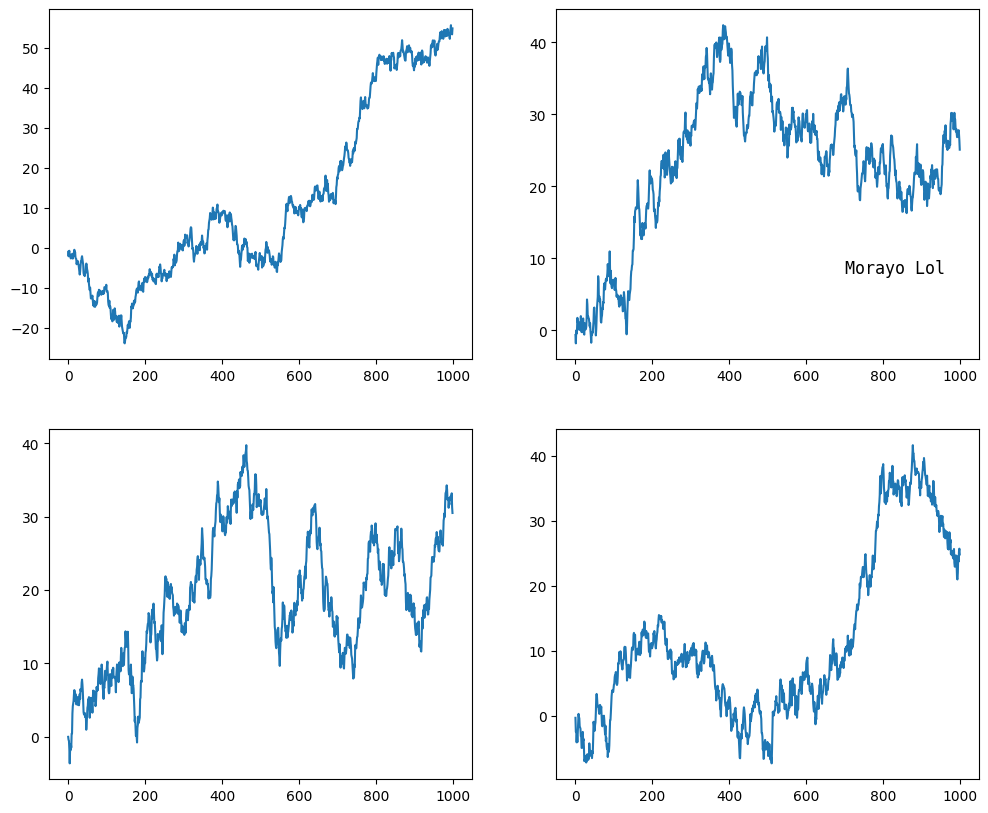

In [121]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)

ax1 = fig.add_subplot(2, 2, 1)

ax1.plot(np.random.randn(1000).cumsum())

ax2 = fig.add_subplot(2, 2, 2)

ax2.plot(np.random.randn(1000).cumsum())

ax3 = fig.add_subplot(2, 2, 3)

ax3.plot(np.random.randn(1000).cumsum())

ax4 = fig.add_subplot(2, 2, 4)

ax4.plot(np.random.randn(1000).cumsum())


ax2.text(700, 8, "Morayo Lol", family="monospace", fontsize=12)

In [152]:
fp = "../datasets/examples/spx.csv"

df = pd.read_csv(fp, index_col=0, parse_dates=True)
df.head(15)

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
1990-02-08,332.96
1990-02-09,333.62
1990-02-12,330.08
1990-02-13,331.02


In [123]:
# plot and annotate the closing S&P 500 index price, with important dates

from datetime import datetime

[(13514.0, 14975.0),
 (600.0, 1800.0),
 Text(0.5, 1.0, 'Important Dates in the 2008-2009 financial crisis')]

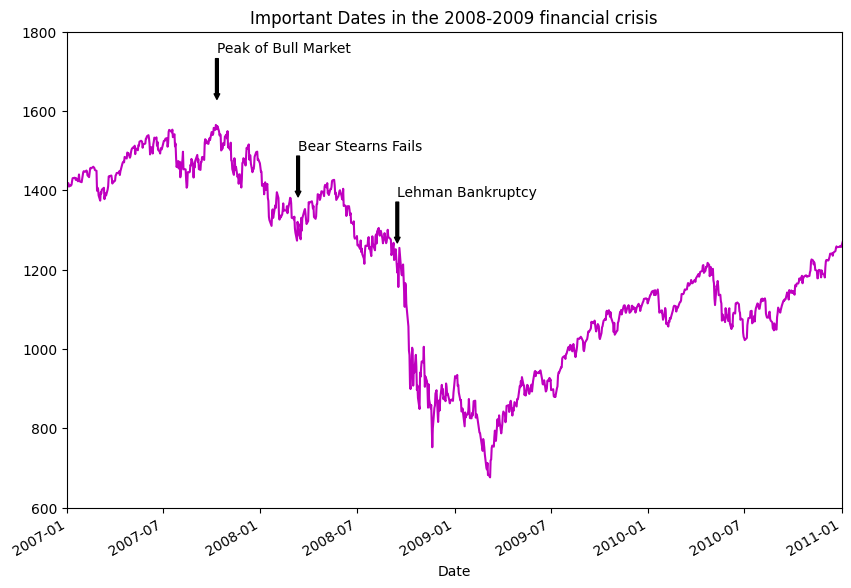

In [168]:
# create the canvas

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)

# add a sub-figure
ax = fig.add_subplot(1, 1, 1)

# get the data we need for plotting
spx = df['SPX']

# plot the spx data
spx.plot(ax=ax, style='m-')

# annotation data indicating the crisis year
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of Bull Market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

# use the crisis data with datetime as x and corresponding string as y to annotate
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 220),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')

# zoom in on 2007 - 2010
props = {
    "xlim": ['1/1/2007', '1/1/2011'],
    "ylim": [600, 1800],
    "title": "Important Dates in the 2008-2009 financial crisis"
}

ax.set(**props)

Creating Shapes and Adding it to A Figure using **add_patch**

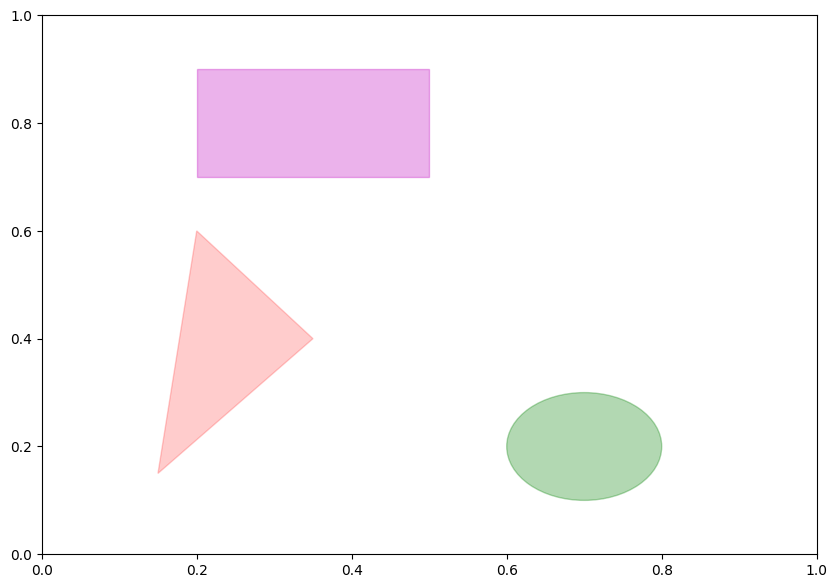

In [176]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.7), width=0.3, height=0.2, rotation_point=(0.1, 0.4), color='m', alpha=0.3)

circ = plt.Circle((0.7, 0.2), radius=0.1, color='g', alpha=0.3)

pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='r', alpha=0.2)


# add shapes to figure

ax.add_patch(circ)
ax.add_patch(rect)
ax.add_patch(pgon)

# save  fig

plt.savefig('myplots.png', dpi=1000, bbox_inches='tight', facecolor='yellow', edgecolor='red')

### Saving Figures and Customization

- file-name and extension: used in the file name;  pdf, png, jpeg, jpg, svg

- dpi: this controls the resolution; the higher the value, the higher the resolution 

- facecolor: background color outside of subplots

- format: explicit file format to use; pdf, svg, png e.t.c.

- bbox_inches: portion of figure to save: 'tight' will trim the empty space


---|||
### Matplotlib Configuration

**matplotlib** can be globally configured, using the pyplot **rc** method

pyplot.rc('what to configure', '[new configuration]')


In [195]:
# set all figures to be of size 10 x 5

plt.rc('figure', figsize=(10, 5))

# configure the fonts

plt.rc('font', family='monospace', weight='medium', size=12)

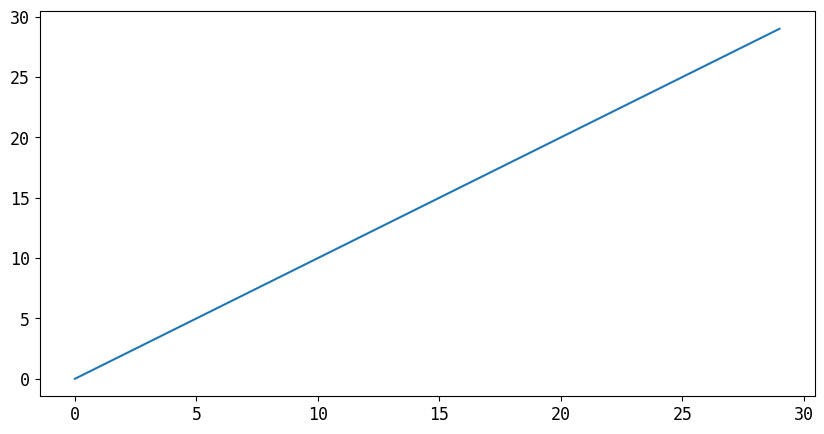

In [196]:
plt.plot(np.arange(30))

In [191]:
import seaborn as sns

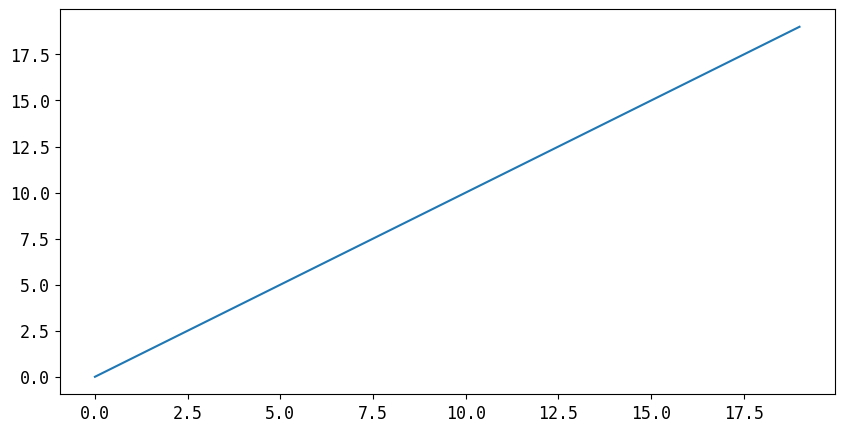

In [197]:
plt.plot(np.arange(20))